In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/Fruits

/content/drive/My Drive/Fruits


In [ ]:
!pip install kaggle

In [ ]:
#Xử dụng dataset fruits của kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nghainh","key":"1a20fbca5f063f2b53ea6925653f8912"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d moltean/fruits

 99% 755M/760M [00:06<00:00, 106MB/s] 
100% 760M/760M [00:06<00:00, 121MB/s]


In [ ]:
#Bắt đầu xây dựng model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [ ]:
pwd

'/content'

In [9]:
# Loading data and putting them into training and test sets

#locations setting for training and test datasets
train_data='/content/drive/My Drive/Fruits/fruits-360/Training1'
test_data='/content/drive/My Drive/Fruits/fruits-360/Test1'

#creates X_train and Y_train using file_names and folders
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

X_train, Y_train, labels = get_data(train_data)
X_test, Y_test,_ = get_data(test_data)
Y_train = np_utils.to_categorical(Y_train, 120)
Y_test = np_utils.to_categorical(Y_test, 120)

In [10]:
# splitting train set into training and validation sets

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [11]:
#converting images into array to start computation

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
X_val = np.array(convert_image_to_array(X_val))
X_test = np.array(convert_image_to_array(X_test))

In [12]:
#nomalizing the pixel values before feeding into a neural network

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [14]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(120,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)       

In [15]:
#importing ootimizers

from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

In [1]:
import tensorflow as tf


In [3]:
pwd

'/content'

In [4]:
cd /content/drive/My Drive/Fruits

/content/drive/My Drive/Fruits


In [17]:
saved_model = tf.keras.models.load_model("transfer_learning.hdf5")

In [21]:
#checking testset accuracy

score = saved_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

28/28 [==============================] - 83s 3s/step - loss: 0.2699 - accuracy: 0.9507
Test accuracy: 0.9506726264953613


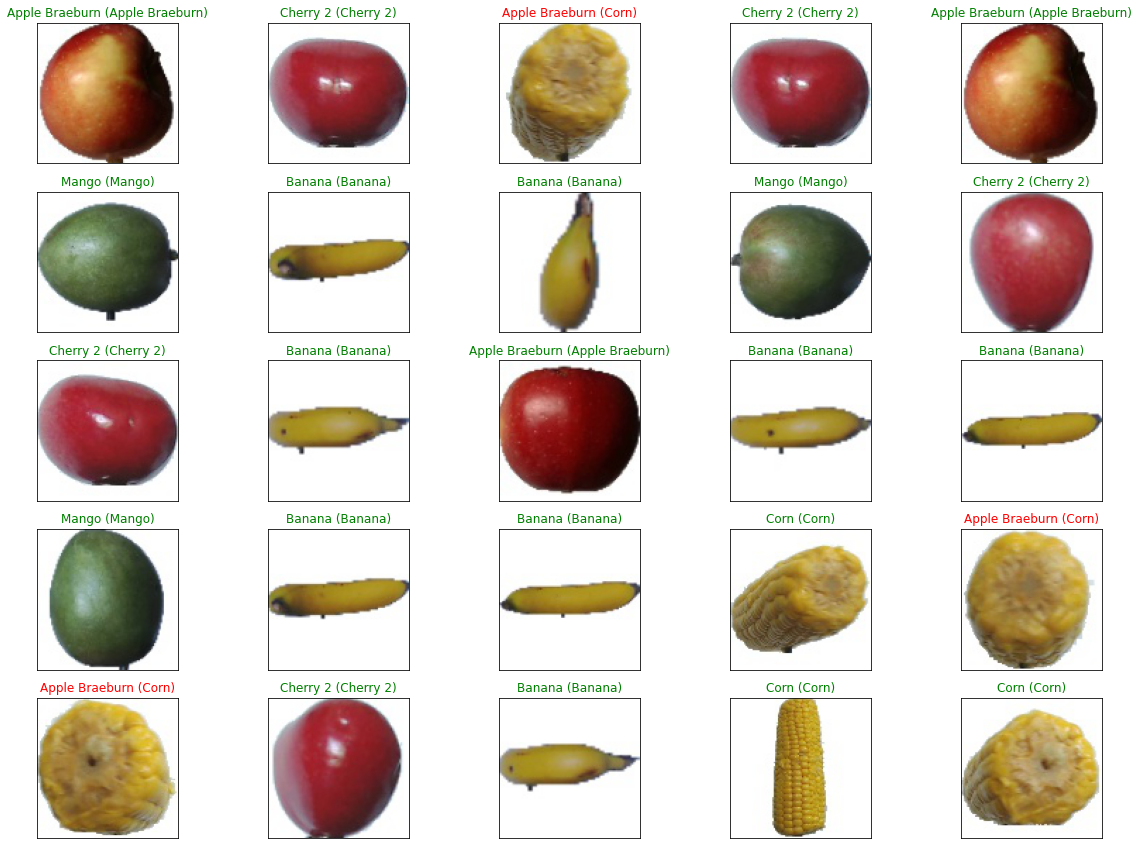

In [23]:
# using model to predict on test data
Y_pred = saved_model.predict(X_test)

# Lets plot the predictions of different fruits and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[1], size=25, replace=False)):
    ax = fig.add_subplot(5,5 , i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
#------------------------------------------------------------------------------------------------------------------

In [ ]:
#importing vgg16

#Part 2 using transfer learning

#importing vgg16 architecture which is trained on Imagenet

from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[100,100,3], weights='imagenet', include_top=False)
#We will not train the layers imported.

for layer in vgg_model.layers:
   layer.trainable = False
  
#summary of the imported vgg model  vgg_model.summary()


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#adding some layers to the vgg_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(vgg_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(120,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 1024)        4719616   
_________________________________________________________________
activation_3 (Activation)    (None, 3, 3, 1024)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)              

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 2128 samples, validate on 532 samples
Epoch 1/20
 - 264s - loss: 0.9127 - accuracy: 0.7444 - val_loss: 0.0300 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.03002, saving model to transfer_learning.hdf5
Epoch 2/20
 - 263s - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0043 - val_accuracy: 1.0000

Epoch 00002: val_loss improved from 0.03002 to 0.00432, saving model to transfer_learning.hdf5
Epoch 3/20
 - 267s - loss: 0.0093 - accuracy: 0.9981 - val_loss: 3.8929e-04 - val_accuracy: 1.0000

Epoch 00003: val_loss improved from 0.00432 to 0.00039, saving model to transfer_learning.hdf5
Epoch 4/20
 - 265s - loss: 0.0058 - accuracy: 0.9986 - val_loss: 1.8629e-04 - val_accuracy: 1.0000

Epoch 00004: val_loss improved from 0.00039 to 0.00019, saving model to transfer_learning.hdf5
Epoch 5/20
 - 270s - loss: 0.0048 - accuracy: 0.9991 - val_loss: 1.1981e-04 - val_accuracy: 1.0000

Epoch 00005: val_loss improved from 0.00019 to 0.00012, saving model to transfer_lear

In [20]:
#score of the new model built using transfer learning

score = transfer_learning_model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

NameError: ignored

NameError: ignored

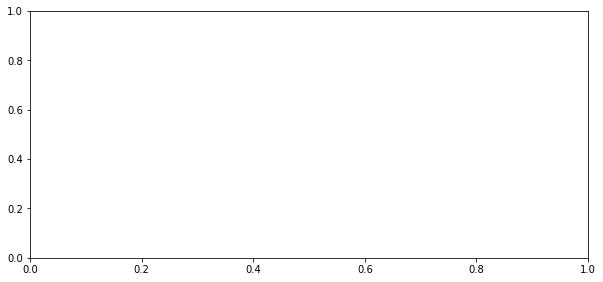

In [ ]:
#plotting curves for the transfer learning model

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()